<a href="https://colab.research.google.com/github/bolouie/MachineLearning-ImageClassification/blob/main/Image_classification_with_fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

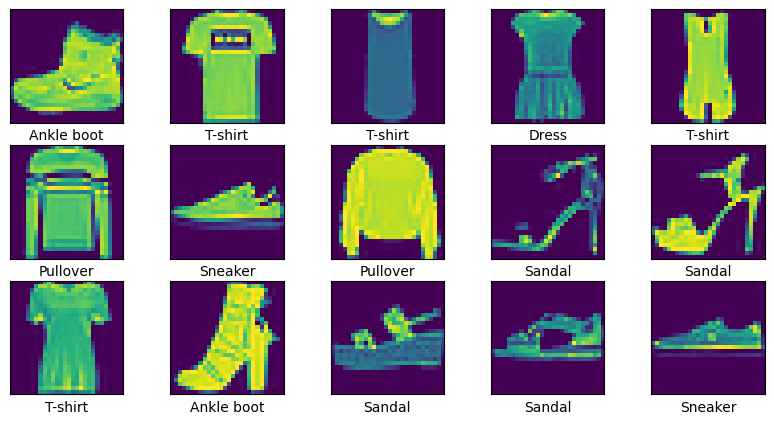

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# LOAD FASHION DATASET, ESP TRAINING AND TEST DATA
fashion_dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_dataset.load_data()

# CLASS NAMES FOR LABELS
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# NORMALIZING TO 0 AND 1
train_images = train_images / 255
test_images = test_images / 255

# ILLUSTRATING DATASET
plt.figure(figsize=(10, 5))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
# ARTIFICIAL BRAIN MODEL THAT RECEIVES DATA TO MAKES SENSE OF IT
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # PREPROCESSING, TREAT LIKE NUMBER SEQ
    tf.keras.layers.Dense(128, activation='relu'), # INPUT NEURONS (Recognition Capacity)
    tf.keras.layers.Dense(10) # OUTPUT NEURONS (equal to number of class_names)
])

# RELIABLE OPTIMIZER 
model.compile(
    optimizer='adam', 
    metrics=['accuracy'],
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

# FEED THE AI BRAIN THE DATA FOR A NUMBER OF TIMES
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5031 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3823 - accuracy: 0.8618
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3399 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3131 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2983 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2827 - accuracy: 0.8948
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2707 - accuracy: 0.8987
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2594 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2494 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

In [18]:
# EVALUATE MODEL AGAINST TEST DATA

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(test_loss)
print(test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8821
0.34030401706695557
0.882099986076355


313/313 [==============================] - 1s 2ms/step


<ipython-input-44-dba03e40472f>:23: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  percentage = np.str(percentage)


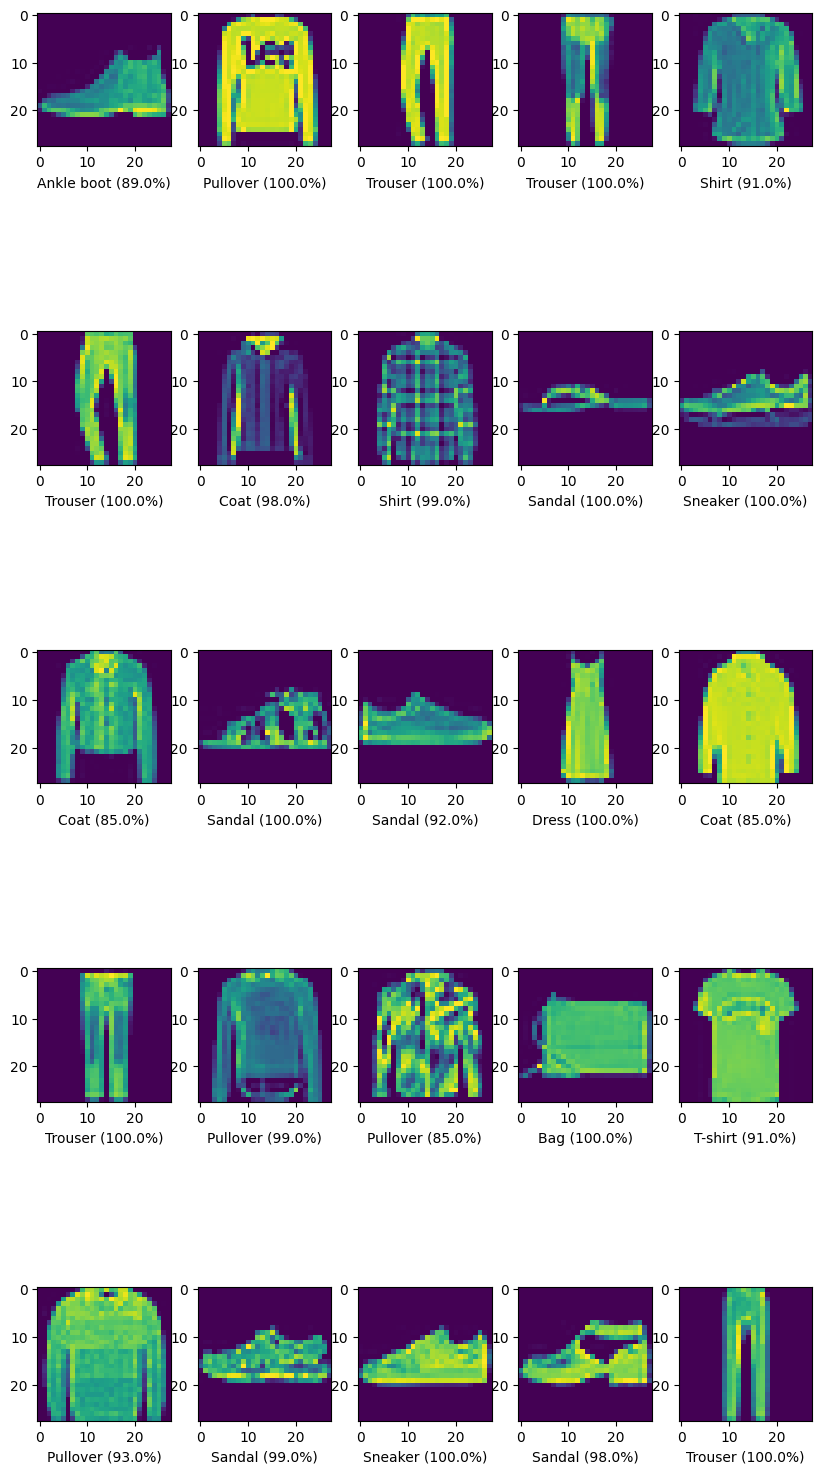

In [44]:
# IMAGE DETERMINATION PROBABILITY
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

predictions = prob_model.predict(test_images)

index = 10

plt.figure(figsize=(10,20))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i])

    prediction_label = np.argmax(predictions[i])
    np.max(predictions[i])

    percentage = np.max(predictions[i])
    percentage = percentage*100
    percentage = np.round(percentage)
    percentage = str(percentage)

    plt.xlabel(class_names[prediction_label] + ' (' + percentage + '%)')

plt.show()

1/1 [==============================] - 0s 24ms/step


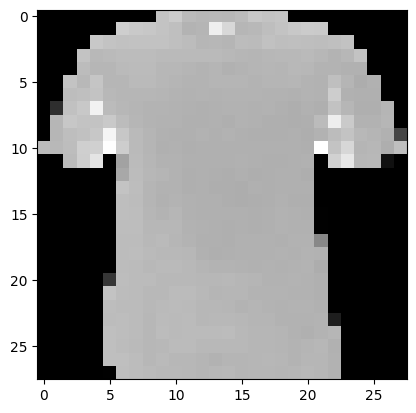

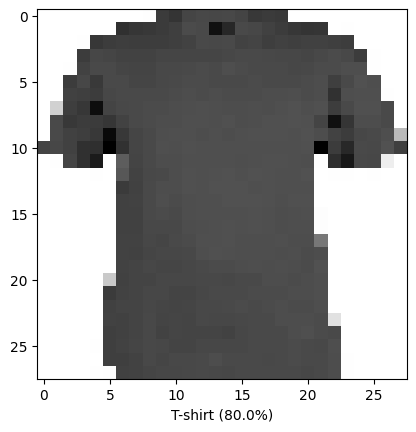

In [74]:
# #Image Classification:  predicting the class or category of a given image using a trained deep learning model. 
# A custom image URL is provided, the image is downloaded, preprocessed (scaled, potentially inverted, and  
# reshaped), and then it's fed into a pre-trained model for prediction. 
# The output is the predicted class of the image and the associated confidence score.



# ALLOW ONE TO PROVIDE CUSTOM IMAGE URL

image_url = "https://upload.wikimedia.org/wikipedia/commons/2/24/Blue_Tshirt.jpg" #@param {type:"string"}

import random, string

chars = ''.join(random.sample(string.ascii_letters, 15))

image_path = tf.keras.utils.get_file(chars, origin=image_url)

# LOAD THE IMAGE
image_obj = tf.keras.preprocessing.image.load_img(
    image_path, target_size=(28, 28), color_mode=("grayscale")
)

# ANALYZE IMAGE AND CONVERT TO NUMERICAL DATA
image_analysis = np.asarray(image_obj)
image_analysis = image_analysis / 255

plt.figure()
plt.imshow(image_obj, cmap=plt.cm.binary)  # Add cmap argument for grayscale

# INVERT IMAGE INFORMATION AS NEEDED
if (image_analysis[0][0] > 0.8): 
  image_obj = np.invert(image_obj)

# PACKAGE IMAGE OBJECT INTO ARRAY AND PUSH TO PROBABILITY MODEL
image_analysis = np.asarray(image_obj)
image_analysis = image_analysis / 255
image_analysis = np.expand_dims(image_analysis, 0)
result = prob_model.predict(image_analysis)  # Fix typo here: .predict, not .predit

# DISPLAY PREDICTION RESULT

plt.figure()
plt.imshow(image_obj, cmap=plt.cm.binary)  # Add cmap argument for grayscale

prediction_label = np.argmax(result)

percentage = np.max(result)
percentage = percentage*100
percentage = np.round(percentage)
percentage = str(percentage)  # use str() instead of np.str()

plt.xlabel(class_names[prediction_label] + ' (' + percentage + '%)')

plt.show()
